Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.6     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)
head(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 5, 10, 4, 10, 1, 8, 1, 13, 5, 5, 3, 10, 11, 3…
$ Glucose                  <dbl> 116, 115, 110, 139, 103, 99, 97, 145, 117, 10…
$ BloodPressure            <dbl> 74, 0, 92, 80, 30, 84, 66, 82, 92, 75, 58, 78…
$ SkinThickness            <dbl> 0, 0, 0, 0, 38, 0, 15, 19, 0, 26, 11, 31, 0, …
$ Insulin                  <dbl> 0, 0, 0, 0, 83, 0, 140, 110, 0, 0, 54, 0, 0, …
$ BMI                      <dbl> 25.6, 35.3, 37.6, 27.1, 43.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.201, 0.134, 0.191, 1.441, 0.183, 0.388, 0.4…
$ Age                      <dbl> 30, 29, 30, 57, 33, 50, 22, 57, 38, 60, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,116,74,0,0,25.6,0.201,30,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
10,139,80,0,0,27.1,1.441,57,0
1,103,30,38,83,43.3,0.183,33,0
8,99,84,0,0,35.4,0.388,50,0


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:** In linear regression, all the dbl variables would be suitable as the outcome since they are quantitative. In logistic regression, the outcome is qualitative so we use Outcome variable.

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

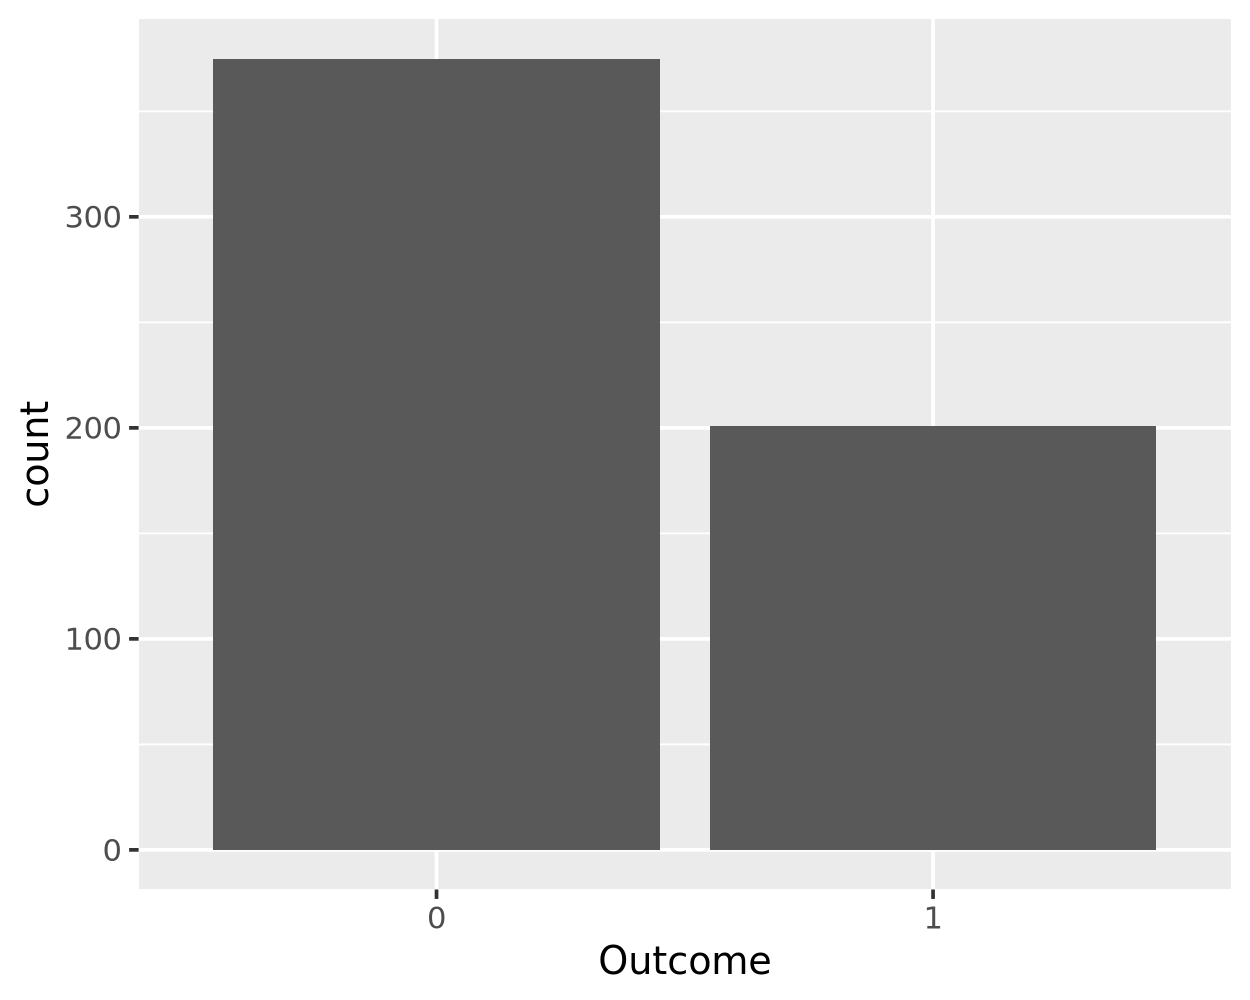

In [5]:
ggplot(diabetes_train, aes(x=Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** No, there are more counts of 0 - almost double that of 1.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [8]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

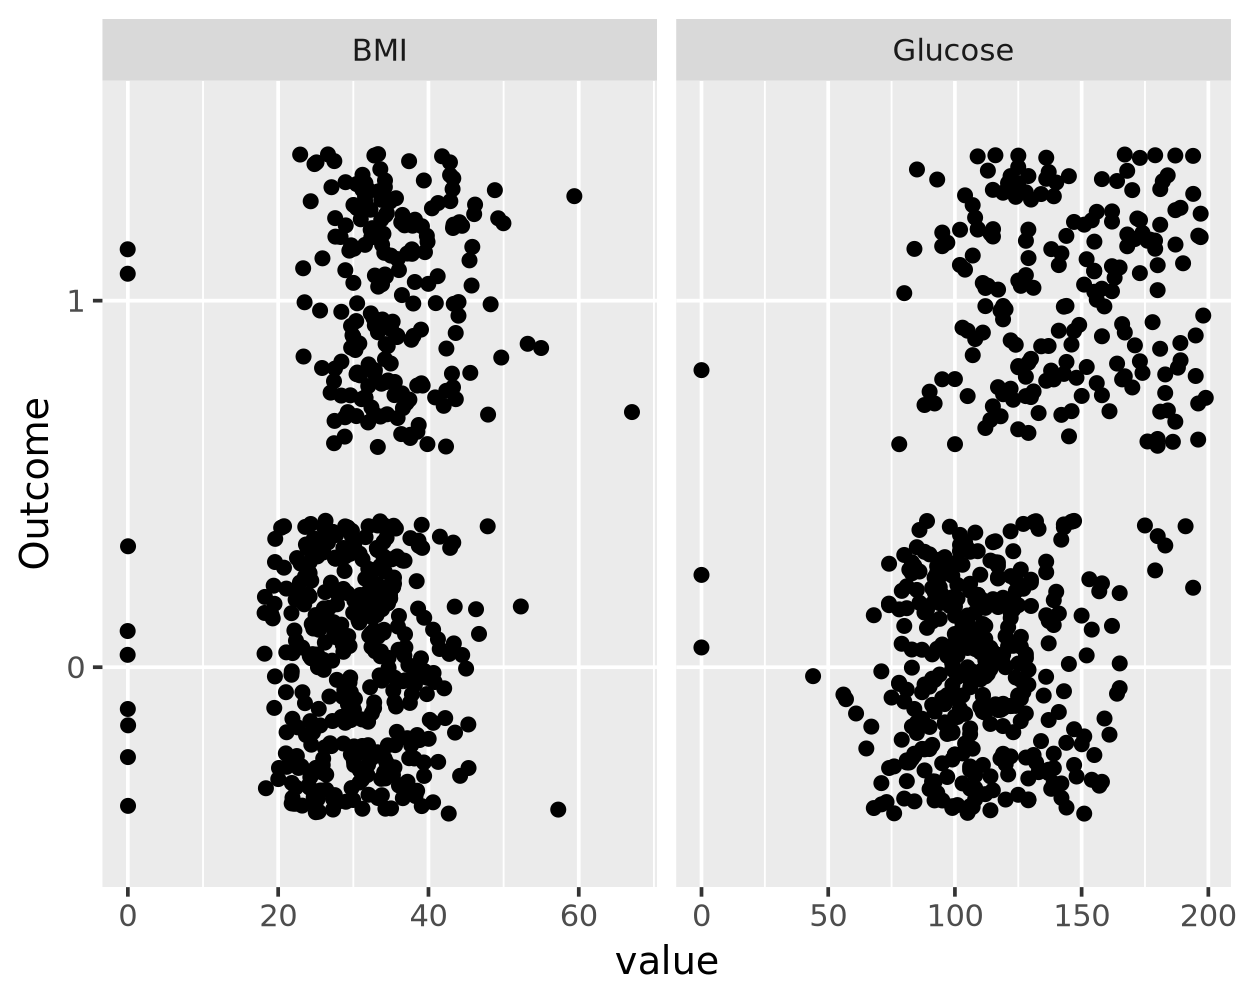

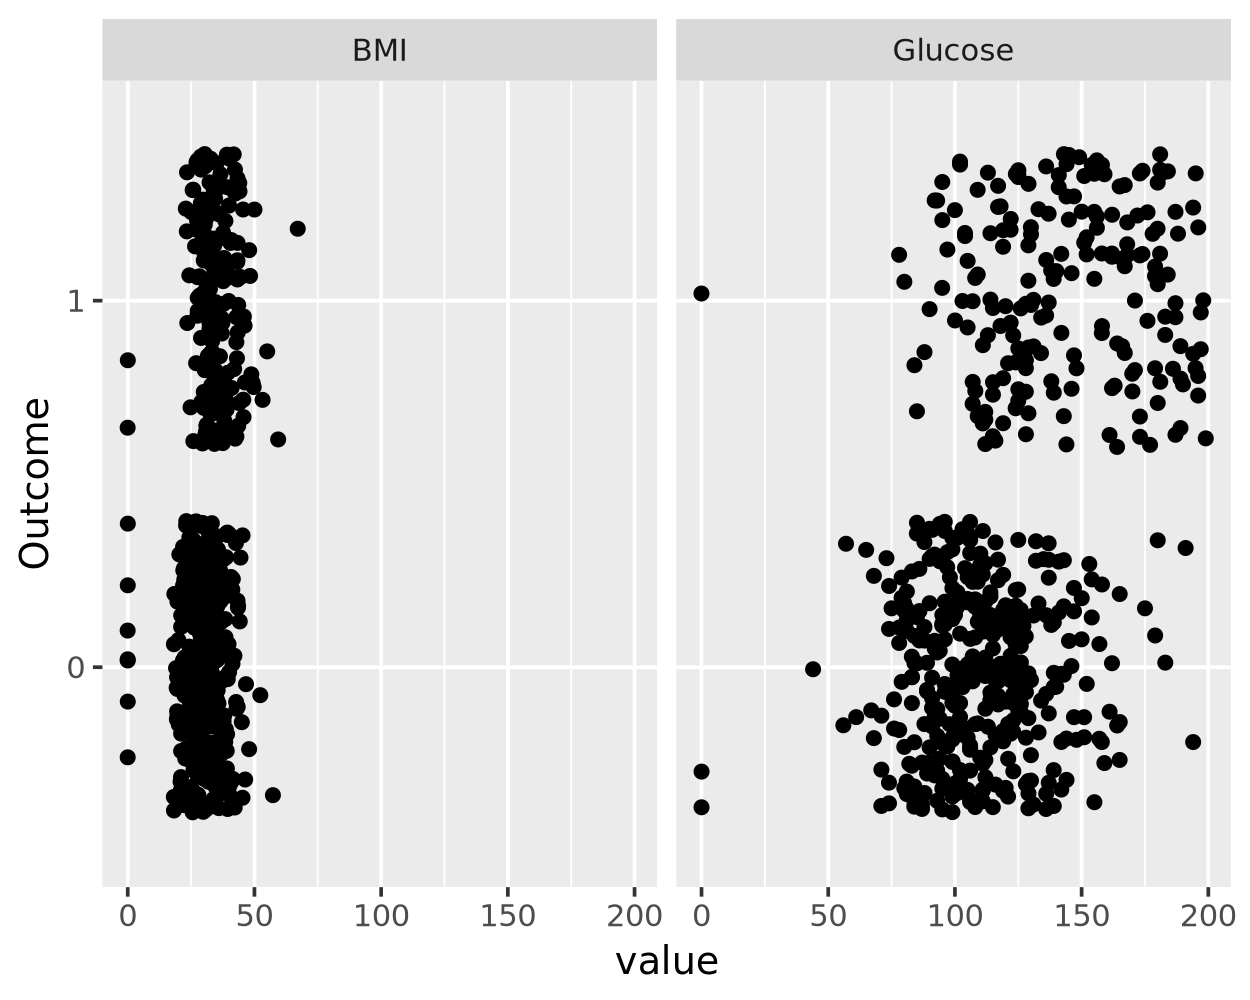

In [12]:
ggplot(plot_df, aes(x=value, y=Outcome)) + geom_jitter() + facet_wrap(~name, ncol = 2, scales = 'free_x')
#ggplot(plot_df, aes(x=name, y=Outcome)) + geom_jitter() + facet_wrap(~name, ncol = 2, scales = 'free_x')
ggplot(plot_df, aes(x=value, y=Outcome)) + geom_jitter() + facet_wrap(~name, ncol = 2)


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** The x-axis (values) changes and the points are more condensed together for BMI since the intervals are larger.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [13]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit((Outcome ~ BMI + Glucose), diabetes_train)
mod_fit
tidy(mod_fit)

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.99146      0.07735      0.03862  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 556.8 	AIC: 562.8

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.99145562,0.724892561,-11.024331,2.916787e-28
BMI,0.07734521,0.015784867,4.899960,9.585631e-07
Glucose,0.03861712,0.003929949,9.826366,8.669056e-23


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [14]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [15]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  35
         1  18  32

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**
- How many individuals had diabetes in your test data? - 67
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? - 32
- How many individuals predicted to have diabetes did not have diabetes? - 18